In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('churn_prediction.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.shape

(7043, 21)

In [11]:
df.size

147903

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.duplicated().sum()


0

In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric columns to numeric using label encoding
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [17]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


In [18]:
df.skew()


customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')


In [20]:
df['gender'].value_counts()


gender
1    3555
0    3488
Name: count, dtype: int64

In [21]:
df['SeniorCitizen'].value_counts()


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [22]:
df['Partner'].value_counts()


Partner
0    3641
1    3402
Name: count, dtype: int64

In [23]:
df['Dependents'].value_counts()


Dependents
0    4933
1    2110
Name: count, dtype: int64

In [24]:
df['PhoneService'].value_counts()


PhoneService
1    6361
0     682
Name: count, dtype: int64

In [25]:
df['MultipleLines'].value_counts()


MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64

In [26]:
df['InternetService'].value_counts()


InternetService
1    3096
0    2421
2    1526
Name: count, dtype: int64

In [27]:
df['OnlineSecurity'].value_counts()


OnlineSecurity
0    3498
2    2019
1    1526
Name: count, dtype: int64

In [28]:
df['OnlineBackup'].value_counts()


OnlineBackup
0    3088
2    2429
1    1526
Name: count, dtype: int64

In [29]:
df['DeviceProtection'].value_counts()


DeviceProtection
0    3095
2    2422
1    1526
Name: count, dtype: int64

In [30]:
df['TechSupport'].value_counts()


TechSupport
0    3473
2    2044
1    1526
Name: count, dtype: int64

In [31]:
df['StreamingTV'].value_counts()


StreamingTV
0    2810
2    2707
1    1526
Name: count, dtype: int64

In [32]:
df['StreamingMovies'].value_counts()


StreamingMovies
0    2785
2    2732
1    1526
Name: count, dtype: int64

In [33]:
df['Contract'].value_counts()


Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [34]:
df['PaperlessBilling'].value_counts()


PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64

In [35]:
df['PaymentMethod'].value_counts()


PaymentMethod
2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64

In [36]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

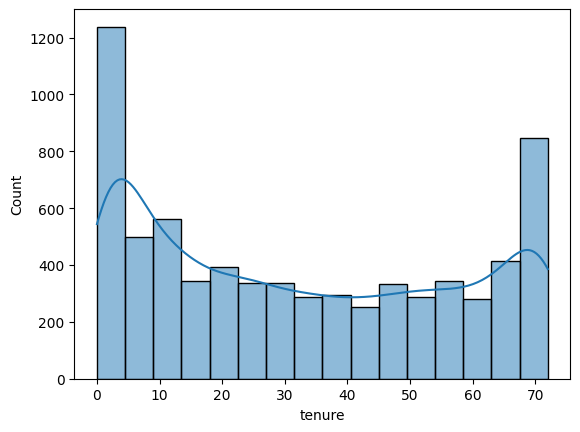

In [37]:
sns.histplot(x = df['tenure'],kde = True)
plt.show()

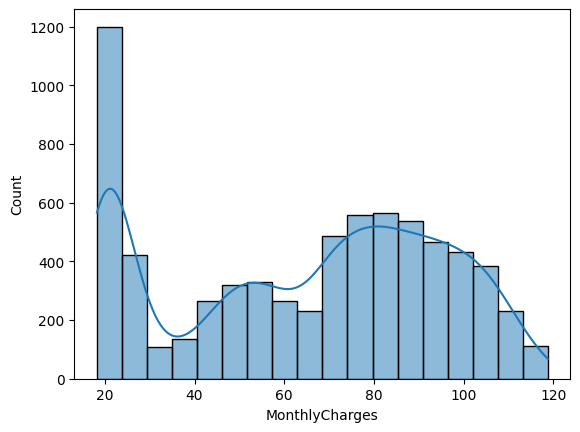

In [38]:
sns.histplot(x = df['MonthlyCharges'],kde = True)
plt.show()

In [40]:
fig = px.sunburst(data_frame=df,
                  path=['gender', 'Churn'],
                  color='Churn',
                  title='Gender vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [41]:
fig = px.sunburst(data_frame=df,
                  path=['SeniorCitizen', 'Churn'],
                  color='Churn',
                  title='SeniorCitizen vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [42]:
fig = px.sunburst(data_frame=df,
                  path=['Partner', 'Churn'],
                  color='Churn',
                  title='Partner vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [43]:
fig = px.sunburst(data_frame=df,
                  path=['Dependents', 'Churn'],
                  color='Churn',
                  title='Dependents vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [44]:
fig = px.sunburst(data_frame=df,
                  path=['PhoneService', 'Churn'],
                  color='Churn',
                  title='PhoneService vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [60]:
fig = px.histogram(data_frame=df,
             x="MultipleLines",
             color="Churn",
             title="<b>MultipleLines vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark') 
fig.show()

In [61]:
fig = px.histogram(data_frame = df,
             x = "InternetService",
             color="Churn", title="<b>InternetService vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark') 

fig.show()

In [62]:
fig = px.histogram(data_frame = df,
             x = "OnlineSecurity",
             color="Churn", title="<b>OnlineSecurity vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [63]:
fig = px.histogram(data_frame = df,
             x = "OnlineBackup",
             color="Churn", title="<b>Onlinebackup vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [64]:
fig = px.histogram(data_frame = df,
             x = "DeviceProtection",
             color="Churn", title="<b>DeviceProtection vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [65]:
fig = px.histogram(data_frame = df,
             x = "TechSupport",
             color="Churn", title="<b>TechSupport vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [66]:
fig = px.histogram(data_frame = df,
             x = "StreamingTV",
             color="Churn", title="<b>StreamingTV vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [67]:
fig = px.histogram(data_frame = df,
             x = "StreamingMovies",
             color="Churn", title="<b>StreamingMovies vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [68]:
fig = px.histogram(data_frame = df,
             x = "Contract",
             color="Churn", title="<b>Contract vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [69]:
fig = px.histogram(data_frame = df,
             x = "PaperlessBilling",
             color="Churn", title="<b>PaperlessBilling vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

In [70]:
fig = px.histogram(data_frame = df,
             x = "PaymentMethod",
             color="Churn", title="<b>PaymentMethod vs Churn</b>",
             pattern_shape_sequence=['|'],
             template='plotly_dark')

fig.show()

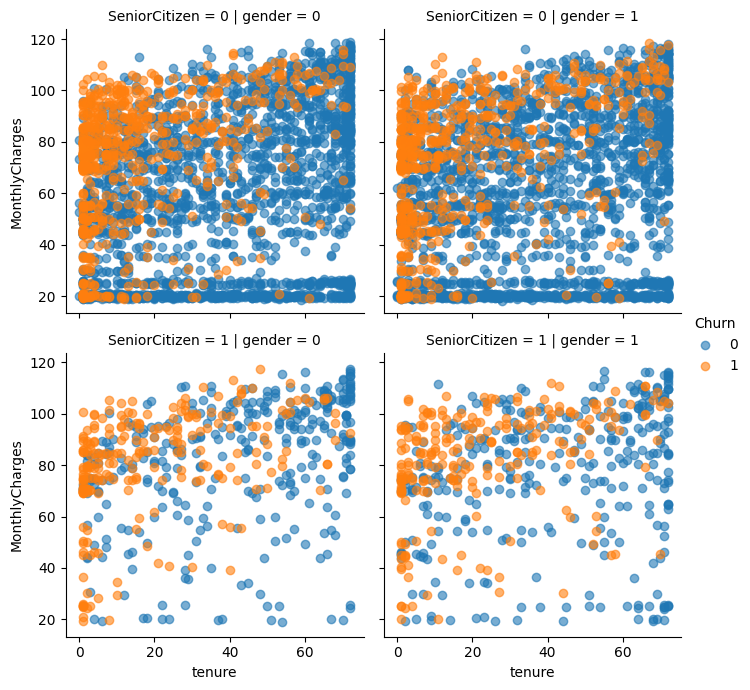

In [76]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

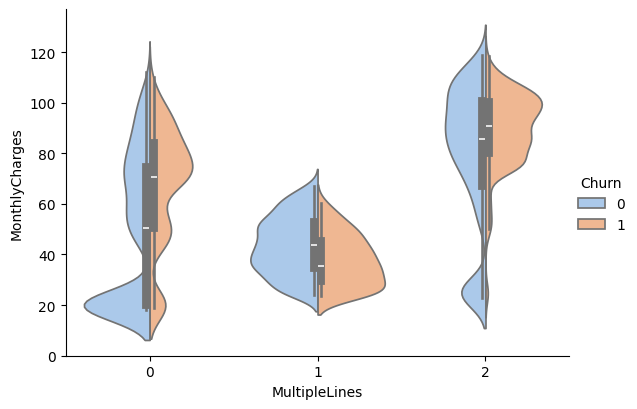

In [98]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

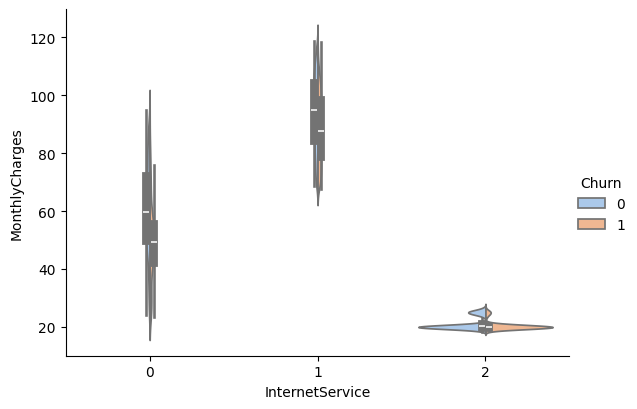

In [99]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

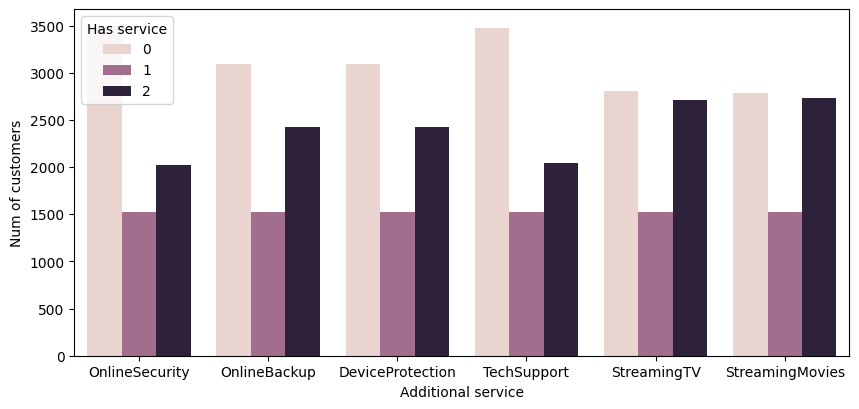

In [100]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

In [103]:
train_no_NA = df.dropna()

train_cat_visual_0 = train_no_NA[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].columns.tolist()

/var/folders/2j/vsk5tfrs0mg2k556hz3x9jl80000gn/T/ipykernel_33212/2455531187.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2j/vsk5tfrs0mg2k556hz3x9jl80000gn/T/ipykernel_33212/2455531187.py:9: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

/var/folders/2j/vsk5tfrs0mg2k556hz3x9jl80000gn/T/ipykernel_33212/2455531187.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2j/vsk5tfrs0mg2k556hz3x9jl80000gn/T/ipykernel_33212/2455531187.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/var/folders/2j/vsk5tfrs0mg2k556hz3x9jl80000gn/T/ipykernel_33212/2

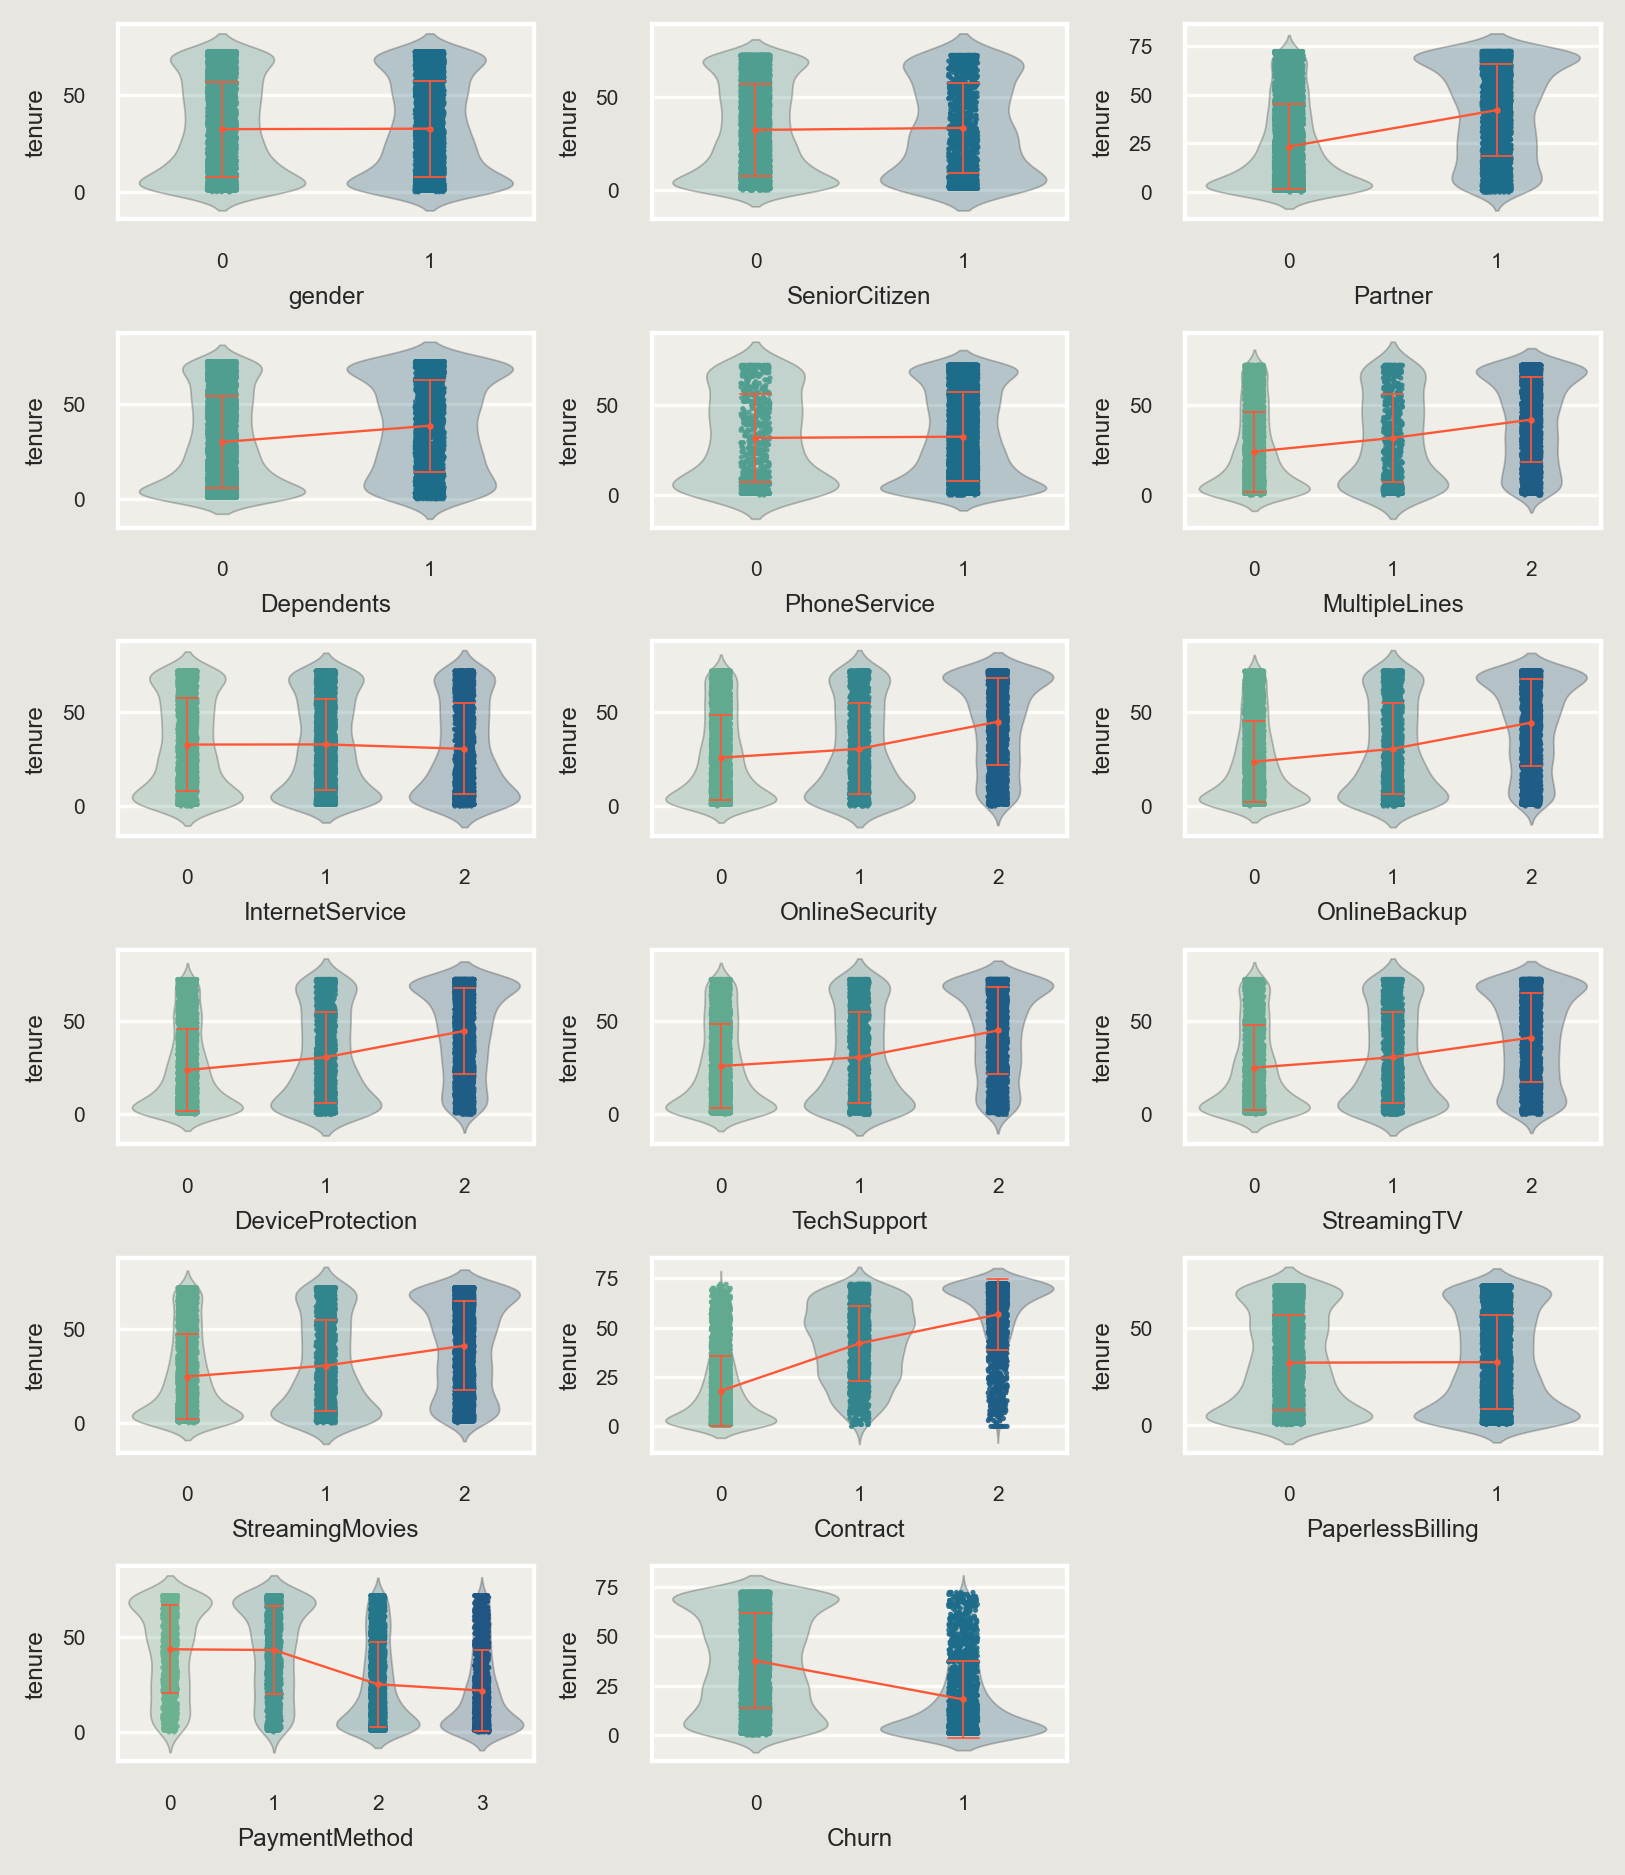

In [104]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.55)

fig, ax = plt.subplots(6, 3, figsize = (6.5, 7.5))

for indx, (column, axes) in list(enumerate(list(zip(train_cat_visual_0, ax.flatten())))):
    
    sns.violinplot(ax = axes, x = train_no_NA[column], 
                   y = train_no_NA['tenure'],
                   scale = 'width', linewidth = 0.5, 
                   palette = 'crest', inner = None)
    
    plt.setp(axes.collections, alpha = 0.3)
    
    sns.stripplot(ax = axes, x = train_no_NA[column], 
                  y = train_no_NA['tenure'],
                  palette = 'crest', alpha = 0.9, 
                  s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = train_no_NA[column],
                  y = train_no_NA['tenure'],
                  color = '#ff5736', scale = 0.25,
                  estimator = np.mean, ci = 'sd',
                  errwidth = 0.5, capsize = 0.15, join = True)
    
    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

In [108]:
train_num_visual_0 = ['MonthlyCharges', 'tenure','TotalCharges']

In [110]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [111]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','TotalCharges', 'Churn'}}
multi_table([df_nunique['gender'], df_nunique['SeniorCitizen'], df_nunique['Partner'],df_nunique['Dependents'],
              df_nunique['PhoneService'],df_nunique['MultipleLines'],df_nunique['InternetService'] ,
             df_nunique['OnlineSecurity'], df_nunique['OnlineBackup'],df_nunique['DeviceProtection'],
            df_nunique['TechSupport'],df_nunique['StreamingTV'],df_nunique['StreamingMovies'],df_nunique['Contract'],
            df_nunique['PaperlessBilling'],df_nunique['Churn']])

,count
gender,
1,3555
0,3488
,count
SeniorCitizen,
0,5901
1,1142
,count
Partner,
0,3641


In [112]:
df_groupby = {var: pd.DataFrame(df.groupby([var, 'Churn']).size()) 
              for var in {'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'}}
multi_table([df_groupby['gender'], df_groupby['SeniorCitizen'], df_groupby['Partner'],df_groupby['Dependents'],
              df_groupby['PhoneService'],df_groupby['MultipleLines'],df_groupby['InternetService'] ,
             df_groupby['OnlineSecurity'], df_groupby['OnlineBackup'],df_groupby['DeviceProtection'],
            df_groupby['TechSupport'],df_groupby['StreamingTV'],df_groupby['StreamingMovies'],df_groupby['Contract'],
            df_groupby['PaperlessBilling']])

In [113]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


Data Cleaning

In [ ]:
df.drop(['customerID','Churn'],axis = 1,inplace = True)

In [117]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_rate
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


On-Hot Encoding

In [118]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_rate,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,...,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,1,29.85,2505,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1466,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,157,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1400,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,925,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1597,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,5698,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,2994,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,2660,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [120]:
from sklearn.impute import SimpleImputer

# Imputation

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df1.drop(['churn_rate'],axis = 1))
scaled_features = scaler.transform(df1.drop('churn_rate',axis = 1))

In [122]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['churn_rate']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

Prediction using Logistic Regression

In [130]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [131]:
pred = logmodel.predict(X_test)

In [132]:
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.52      0.58       556

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1403  154]
 [ 268  288]]


In [133]:
logmodel.score(X_test,Y_test)

0.8002839564600095

Prediction using Decisiontree

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

In [135]:
confusion_matrix(Y_test, y_pred)

array([[1261,  296],
       [ 288,  268]])

In [136]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1557
           1       0.48      0.48      0.48       556

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113



In [137]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.7236157122574538


Gradient Boosting Classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/abhishek/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abhishek/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhishek/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/abhishek/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py", line 637, i

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [141]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.8032454361054768


In [143]:
gb = GradientBoostingClassifier(learning_rate=0.1, loss='log_loss', n_estimators=180)
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test) 

In [144]:
print(accuracy_score(Y_test, y_pred))

0.791292001893043


XGB Classifier

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)

In [146]:
print(accuracy_score(Y_test, y_pred))

0.7998106956933271
